In [1]:
import pandas as pd
raw_df=pd.read_excel('/content/renege.xlsx')

In [2]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7569 entries, 0 to 7568
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   CID       7569 non-null   object
 1   workexp   7569 non-null   int64 
 2   age       7569 non-null   int64 
 3   gender    7569 non-null   object
 4   Source    7569 non-null   object
 5   Educ      7569 non-null   object
 6   previous  7569 non-null   object
 7   location  7569 non-null   object
 8   Joined    7569 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 532.3+ KB


In [3]:
raw_df.head()

,CID,workexp,age,gender,Source,Educ,previous,location,Joined
0,C2015UUGM44,3,32,F,3-SocialMedia,e2,Yes,L4,0
1,C20152LRE59,3,37,M,1-Consultancy,e1,Yes,L5,1
2,C20156UMBMO,4,36,F,3-SocialMedia,e2,Yes,L1,0
3,C2015LZSL81,3,44,M,1-Consultancy,e1,Yes,L3,1
4,C2015JFDHT1,4,43,M,2-Referral,e1,Yes,L1,1


In [4]:
raw_df

,CID,workexp,age,gender,Source,Educ,previous,location,Joined
0,C2015UUGM44,3,32,F,3-SocialMedia,e2,Yes,L4,0
1,C20152LRE59,3,37,M,1-Consultancy,e1,Yes,L5,1
2,C20156UMBMO,4,36,F,3-SocialMedia,e2,Yes,L1,0
3,C2015LZSL81,3,44,M,1-Consultancy,e1,Yes,L3,1
4,C2015JFDHT1,4,43,M,2-Referral,e1,Yes,L1,1
...,...,...,...,...,...,...,...,...,...
7564,C2015XGXX2J,4,44,M,2-Referral,e1,Yes,L1,1
7565,C2015VA2O57,5,37,M,2-Referral,e2,No,L4,0
7566,C2015USNSNG,4,36,F,3-SocialMedia,e2,Yes,L7,1
7567,C2015BWO9N1,4,36,M,3-SocialMedia,e2,No,L1,0


In [8]:
raw_df['Educ'].value_counts()

,count
Educ,
e2,4012
e1,3557


In [9]:
##-------------------------------------------------------------------
##  Select the Predictor Variables into a dataframe called X_features
##--------------------------------------------------------------------
X_features = list( raw_df.columns )
X_features.remove( 'Joined' )
X_features.remove( 'CID' )


In [10]:
print(X_features)

['workexp', 'age', 'gender', 'Source', 'Educ', 'previous', 'location']


In [11]:
##------------------------------------------
##  Set up a dataframe with only X-variables
##------------------------------------------
X =  raw_df[X_features]


In [12]:
##------------------------------------------
##  Identify the Class Label or Y variable
##------------------------------------------
Y = raw_df.Joined.astype('category')

print(Y.info())

<class 'pandas.core.series.Series'>
RangeIndex: 7569 entries, 0 to 7568
Series name: Joined
Non-Null Count  Dtype   
--------------  -----   
7569 non-null   category
dtypes: category(1)
memory usage: 7.6 KB
None


In [13]:
##-----------------------------------------
##  Split the Data into Training and Test
##  test size=0.3 indicates 70% training and
##  30% test data
##-----------------------------------------
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
Y,
test_size = 0.3,
random_state = 500)
print(y_train.info())

##############################################################################
##  All data processing should be done after split to prevent data leakage  ##
##############################################################################

<class 'pandas.core.series.Series'>
Index: 5298 entries, 1889 to 7002
Series name: Joined
Non-Null Count  Dtype   
--------------  -----   
5298 non-null   category
dtypes: category(1)
memory usage: 46.7 KB
None


In [15]:
X.select_dtypes(include=['object']).columns

Index(['gender', 'Source', 'Educ', 'previous', 'location'], dtype='object')

In [17]:
X.select_dtypes(include=['int64','float64']).columns

Index(['workexp', 'age'], dtype='object')

In [16]:
##############################################################################
##  Pre-process X-vars   ##
##############################################################################

##-----------------------------------------------------------------------
##  1. Identify and dummy code (one-hot encoding) the categorical column
##-----------------------------------------------------------------------
# List of categorical columns
categorical_columns = ['gender', 'Source', 'Educ', 'previous', 'location']
X_train_encoded = pd.get_dummies(X_train, columns=categorical_columns,drop_first = True,dtype=int )
X_test_encoded = pd.get_dummies(X_test, columns=categorical_columns,drop_first = True ,dtype=int)



In [18]:
##-----------------------------------------------------------------------
##  2. Normalise the cont. columns
##-----------------------------------------------------------------------
from sklearn.preprocessing import MinMaxScaler
continuous_columns= ['workexp', 'age']
scaler_min_max = MinMaxScaler()
X_train_encoded[continuous_columns] = scaler_min_max.fit_transform(X_train_encoded[continuous_columns])
X_test_encoded[continuous_columns] = scaler_min_max.fit_transform(X_test_encoded[continuous_columns])

In [19]:
X_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5298 entries, 1889 to 7002
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   workexp               5298 non-null   float64
 1   age                   5298 non-null   float64
 2   gender_M              5298 non-null   int64  
 3   Source_2-Referral     5298 non-null   int64  
 4   Source_3-SocialMedia  5298 non-null   int64  
 5   Educ_e2               5298 non-null   int64  
 6   previous_Yes          5298 non-null   int64  
 7   location_L2           5298 non-null   int64  
 8   location_L3           5298 non-null   int64  
 9   location_L4           5298 non-null   int64  
 10  location_L5           5298 non-null   int64  
 11  location_L7           5298 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 538.1 KB


In [20]:
X_train_encoded.head()

,workexp,age,gender_M,Source_2-Referral,Source_3-SocialMedia,Educ_e2,previous_Yes,location_L2,location_L3,location_L4,location_L5,location_L7
1889,0.666667,0.666667,1,0,1,1,1,1,0,0,0,0
1131,0.666667,0.555556,0,0,1,1,1,0,1,0,0,0
5819,0.666667,0.666667,1,0,0,1,1,1,0,0,0,0
5431,0.333333,0.500000,1,0,0,1,1,0,0,0,1,0
6647,0.666667,1.000000,1,1,0,0,1,0,1,0,0,0


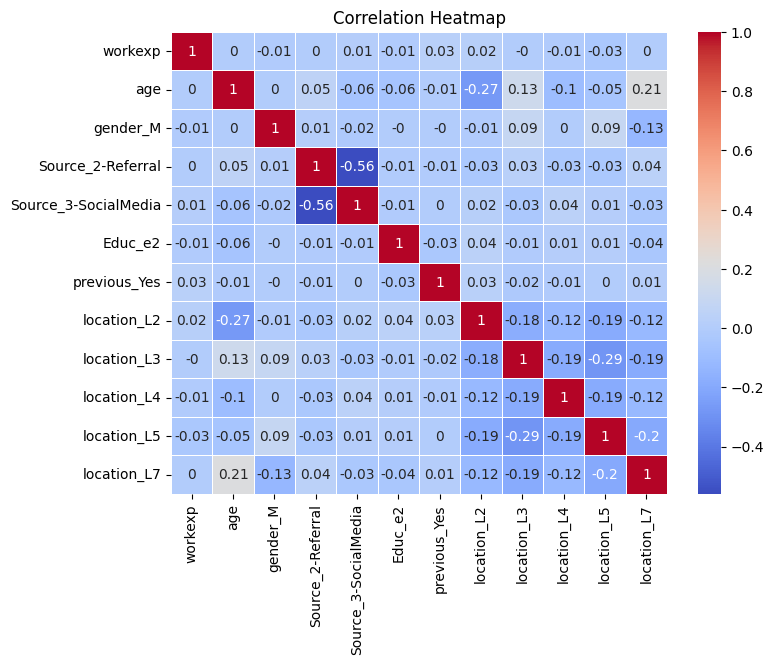

In [21]:
##-----------------------------------------------------------------------
##  3. Identify and and remove highly correlated columns
##-----------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix = X_train_encoded.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix.round(2), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [22]:
corr_matrix

,workexp,age,gender_M,Source_2-Referral,Source_3-SocialMedia,Educ_e2,previous_Yes,location_L2,location_L3,location_L4,location_L5,location_L7
workexp,1.000000,0.000867,-0.011264,0.004432,0.007896,-0.012334,0.025400,0.021956,-0.004062,-0.008893,-0.031288,0.000376
age,0.000867,1.000000,0.004479,0.053601,-0.061811,-0.059932,-0.007156,-0.268993,0.133609,-0.101654,-0.048709,0.206405
gender_M,-0.011264,0.004479,1.000000,0.013644,-0.016401,-0.003616,-0.001057,-0.013379,0.093323,0.002452,0.093104,-0.134907
Source_2-Referral,0.004432,0.053601,0.013644,1.000000,-0.559988,-0.012482,-0.009683,-0.032638,0.026610,-0.031261,-0.025088,0.044694
Source_3-SocialMedia,0.007896,-0.061811,-0.016401,-0.559988,1.000000,-0.006427,0.001883,0.020457,-0.025447,0.037408,0.007572,-0.026514
Educ_e2,-0.012334,-0.059932,-0.003616,-0.012482,-0.006427,1.000000,-0.025471,0.037056,-0.008124,0.011010,0.014219,-0.044341
previous_Yes,0.025400,-0.007156,-0.001057,-0.009683,0.001883,-0.025471,1.000000,0.029689,-0.015918,-0.010414,0.000266,0.006095
location_L2,0.021956,-0.268993,-0.013379,-0.032638,0.020457,0.037056,0.029689,1.000000,-0.184386,-0.121030,-0.191456,-0.122791
location_L3,-0.004062,0.133609,0.093323,0.026610,-0.025447,-0.008124,-0.015918,-0.184386,1.000000,-0.185837,-0.293975,-0.188541
location_L4,-0.008893,-0.101654,0.002452,-0.031261,0.037408,0.011010,-0.010414,-0.121030,-0.185837,1.000000,-0.192963,-0.123757


In [23]:
from sklearn.neural_network import MLPClassifier
# no of nodes in hidden layer = 9
# no of iterations increased to 1500
# verbose  = True
# early stopping  = True
nn_model = MLPClassifier(random_state=42, verbose=True, max_iter=1500,hidden_layer_sizes=(9,), early_stopping = True )

In [24]:
print("Hyperparameters of the MLPClassifier:\n",nn_model.get_params() )

Hyperparameters of the MLPClassifier:
 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': True, 'epsilon': 1e-08, 'hidden_layer_sizes': (9,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 1500, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 42, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': True, 'warm_start': False}


In [25]:
##-------------------------------------------------------
##  Train NN model on training data
##-------------------------------------------------------
nn_model.fit(X_train_encoded, y_train)

Iteration 1, loss = 0.65630237
Validation score: 0.645283
Iteration 2, loss = 0.64560772
Validation score: 0.666038
Iteration 3, loss = 0.63365309
Validation score: 0.679245
Iteration 4, loss = 0.61810624
Validation score: 0.700000
Iteration 5, loss = 0.59849962
Validation score: 0.724528
Iteration 6, loss = 0.57560096
Validation score: 0.732075
Iteration 7, loss = 0.55262582
Validation score: 0.737736
Iteration 8, loss = 0.53145143
Validation score: 0.739623
Iteration 9, loss = 0.51326226
Validation score: 0.743396
Iteration 10, loss = 0.49626007
Validation score: 0.749057
Iteration 11, loss = 0.48134555
Validation score: 0.749057
Iteration 12, loss = 0.46799708
Validation score: 0.754717
Iteration 13, loss = 0.45544166
Validation score: 0.752830
Iteration 14, loss = 0.44370522
Validation score: 0.764151
Iteration 15, loss = 0.43272044
Validation score: 0.779245
Iteration 16, loss = 0.42215209
Validation score: 0.775472
Iteration 17, loss = 0.41253408
Validation score: 0.779245
Iterat

MLPClassifier(early_stopping=True, hidden_layer_sizes=(9,), max_iter=1500,
              random_state=42, verbose=True)

In [26]:
##----------------------------
##  Apply model on test data
##----------------------------
y_prob=nn_model.predict_proba(X_test_encoded)[:,1] # probabilities
#y_prob holds the probability values for each record in the test data

In [27]:
y_prob

array([0.65225811, 0.48866031, 0.01575565, ..., 0.34914551, 0.42174236,
       0.0234562 ])

In [28]:
#Create a dataframe to store the test data's Y value and the predicted probability value
#The original admit column is stored as "actual_Y"
#The predicted prob is stored in y_prob
y_pred_df = pd.DataFrame( { "actual_Y": y_test,
"predicted_prob":y_prob})
print(y_pred_df.head())

     actual_Y  predicted_prob
6161        1        0.652258
1012        0        0.488660
6625        0        0.015756
4067        0        0.331497
5803        1        0.748933


In [29]:
##---------------------------------
##  Based on default cut-off -0.5
##---------------------------------
y_pred_df['predicted_Y'] = y_pred_df.predicted_prob.map(
lambda x: 1 if x >= 0.5 else 0)
print(y_pred_df.head())

     actual_Y  predicted_prob  predicted_Y
6161        1        0.652258            1
1012        0        0.488660            0
6625        0        0.015756            0
4067        0        0.331497            0
5803        1        0.748933            1


In [30]:
from sklearn.metrics import confusion_matrix
# Generating the confusion matrix using the DataFrame columns
cm = confusion_matrix(y_pred_df['actual_Y'],y_pred_df['predicted_Y'])
print(cm)

[[1031  198]
 [ 187  855]]


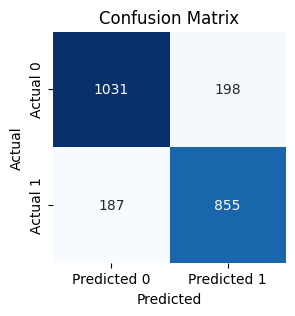

In [31]:
# Create a heatmap for the confusion matrix
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [32]:
# Calculate Sensitivity (Recall), Specificity, and Accuracy using scikit-learn functions
from sklearn.metrics import  accuracy_score, recall_score, precision_score
sensitivity = recall_score(y_pred_df['actual_Y'], y_pred_df['predicted_Y'])
accuracy = accuracy_score(y_pred_df['actual_Y'], y_pred_df['predicted_Y'])

# Print metrics
print(f"Sensitivity (Recall): {sensitivity:.2f}")
#print(f"Specificity: {specificity:.2f}")
print(f"Accuracy: {accuracy:.2f}")

Sensitivity (Recall): 0.82
Accuracy: 0.83


In [33]:
from sklearn.metrics import confusion_matrix, classification_report
print("\nClassification Report:")
print(classification_report(y_pred_df['actual_Y'],y_pred_df['predicted_Y']))


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1229
           1       0.81      0.82      0.82      1042

    accuracy                           0.83      2271
   macro avg       0.83      0.83      0.83      2271
weighted avg       0.83      0.83      0.83      2271



model acc = 83%

point of interset -> class 0(renged)
specificity = 84%

- report->
- nn hyper params-
 max_iterations = 1500

 early_stopping = True

 hidden_layer_sizes = 9